In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [2]:
from torchvision import datasets
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset'

In [3]:
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Method Resolution Order
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F115001AE60>, 2, 'bird')


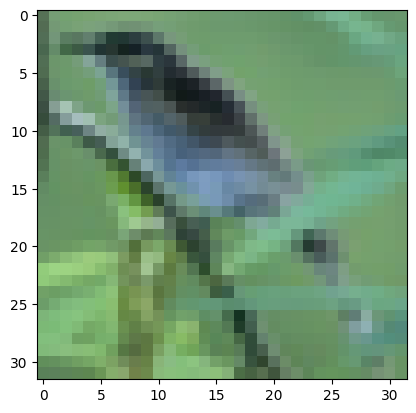

In [5]:
# Dataset.__getitem__ is the method that loads an individual item.
img, label = cifar10[800]

plt.imshow(img)
print((img, label, cifar10.classes[label]))

In [6]:
# Dataset.__len__ is the method that returns the number of items in the dataset.
len(cifar10), len(cifar10_val)

(50000, 10000)

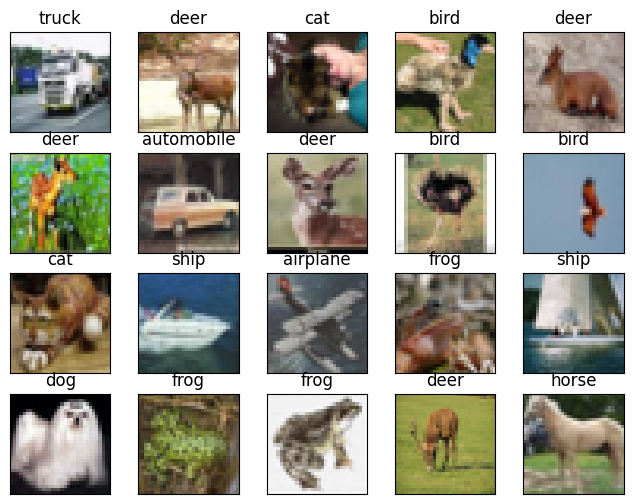

In [7]:
fig = plt.figure(figsize=(8,6))
n_images = 20
for i in range(n_images):
    img, label = cifar10[1000 + i]
    ax = fig.add_subplot(4, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(cifar10.classes[label])
    plt.imshow(img)
plt.show()

In [8]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [9]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [10]:
tensor_cifar10 = datasets.CIFAR10(
    data_path,
    train=True, 
    download=False,
    transform=transforms.ToTensor()
)

In [11]:
img_t, _ = tensor_cifar10[99]
img_t.to('cuda')
type(img_t)

torch.Tensor

In [12]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [13]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

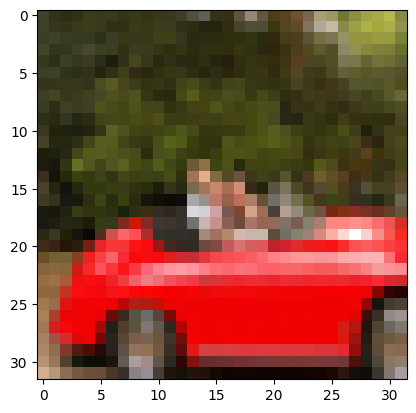

In [14]:
# Permute the dimensions of the tensor from C x H x W to H x W x C
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [15]:
type(tensor_cifar10)

torchvision.datasets.cifar.CIFAR10

In [16]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3).to('cuda')
imgs.shape

torch.Size([3, 32, 32, 50000])

In [17]:
# View is a method that changes the shape of a tensor without changing its data
# 3 x 32 x 32 x 50000 -> 3 x 32*32*50000
# Each image is collapsed into a single column for each channel
imgs.view(3, -1).shape

torch.Size([3, 51200000])

In [18]:
# In this case, we want to keep the three channels separate and collapse all 
# the H x W images into a single column
imgs.view(3, -1, 50000).shape

torch.Size([3, 1024, 50000])

In [19]:
# In this case, we collapse each image into a single column, but we keep
# each ima
imgs.view(-1, 50000).shape

torch.Size([3072, 50000])

In [20]:
# By taking the mean of the last dimension, we are averaging over all the images
imgs.mean(dim=-1).shape

torch.Size([3, 32, 32])

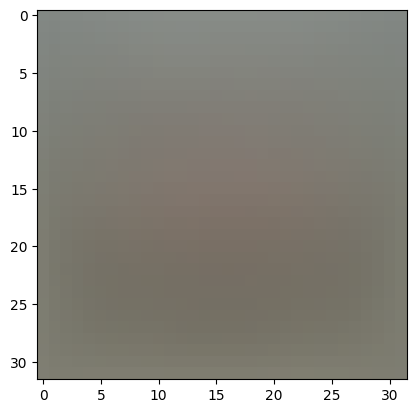

In [21]:
# This is the mean image of the dataset
mean_img = imgs.mean(dim=-1)
plt.imshow(mean_img.permute(1, 2, 0).cpu())

In [22]:
tensor_cifar10.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

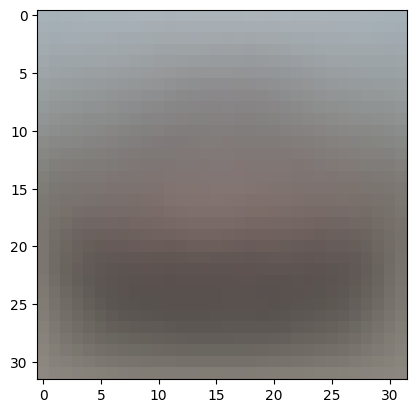

In [25]:
# Mean image of the given class
class_label = 9
class_imgs = torch.stack([img for img, label in tensor_cifar10 if label == class_label], dim=3).to('cuda')
class_mean = class_imgs.mean(dim=-1)
plt.imshow(class_mean.permute(1, 2, 0).cpu())

In [26]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465], device='cuda:0')

In [27]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616], device='cuda:0')

In [28]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [29]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [30]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


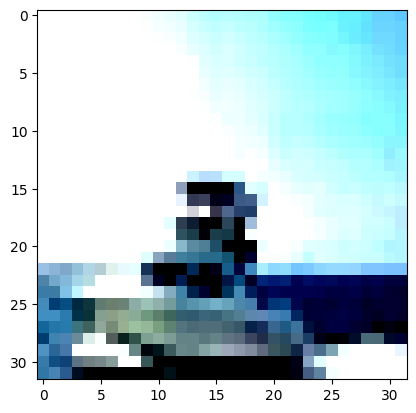

In [31]:
img_t, _ = transformed_cifar10[100]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()